## Experiment 2: INGR Tf-Idf

Analyze the posts text using Tf-Idf features.

Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a greek spaCy model for nlp
import spacy
nlp = spacy.load("el_core_news_sm")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

Load and cleanup the data file

In [2]:
# Load the csv file containing the posts
# Use only "URL", "Link Text" and "Total Interactions" columns
posts_df = pd.read_csv("Datasets/ingr/ingr.csv",
                       usecols=["URL", "Link Text", "Total Interactions"])[
    ["URL", "Link Text", "Total Interactions"]]

# Remove the " | in.gr" suffix from the "Link Text" column
posts_df["Link Text"] = posts_df["Link Text"].apply(
    lambda x: x[:-len(" | in.gr")] if x.endswith(" | in.gr") else x)

# Drop rows with missing values values
posts_df = posts_df.dropna().reset_index(drop=True)

# Filter out rows with "Total Interactions" values below 0.05 quantile and above 0.95 quantile
posts_df = posts_df.loc[(posts_df["Total Interactions"] >= posts_df[
    "Total Interactions"].quantile(.05)) & (posts_df["Total Interactions"] <= posts_df[
    "Total Interactions"].quantile(.95))].reset_index(drop=True)
posts_df

,URL,Link Text,Total Interactions
0,https://www.facebook.com/293834325961/posts/10...,Προσοχή! Έτσι θα καταλάβετε ποιος χρησιμοποιεί...,2
1,https://www.facebook.com/293834325961/posts/10...,Emoji : Η συντριπτική πλειοψηφία των χρηστών ε...,2
2,https://www.facebook.com/293834325961/posts/10...,"""Μεσήλικες που κοιμούνται έξι ώρες ή λιγότερο ...",28
3,https://www.facebook.com/293834325961/posts/10...,Εμβόλιο Covid-19: Πόσο πιθανό είναι να εμφανίσ...,10
4,https://www.facebook.com/293834325961/posts/10...,Κοροναϊός: Νέο τεστ προβλέπει ποιοι θα νοσήσου...,7
...,...,...,...
530,https://www.facebook.com/293834325961/posts/10...,Η Άννα Μαρία Βέλλη «κάρφωσε» την παραγωγή του ...,21
531,https://www.facebook.com/293834325961/posts/10...,Your Face Sounds Familiar: Η απίστευτη μεταμόρ...,5
532,https://www.facebook.com/293834325961/posts/10...,Παύλος Γαλακτερός: Η πρώτη ανάρτηση μετά την α...,4
533,https://www.facebook.com/293834325961/posts/10...,"Survivor: «Δελφίνι θέλουν τα κορίτσια;"" Δελφίν...",0


Split dataset to train and test subsets

In [3]:
train_df, test_df = train_test_split(posts_df, test_size=0.25, random_state=42)

Tf-Idf vectorizer

In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# Remove greek stopwords using spaCy
vec = TfidfVectorizer(stop_words=spacy.lang.el.stop_words.STOP_WORDS)

train_x = vec.fit_transform(train_df["Link Text"])
train_x = pd.DataFrame(train_x.toarray(), columns=vec.get_feature_names())

test_x = vec.transform(test_df["Link Text"])
test_x = pd.DataFrame(test_x.toarray(), columns=vec.get_feature_names())

Regression problem

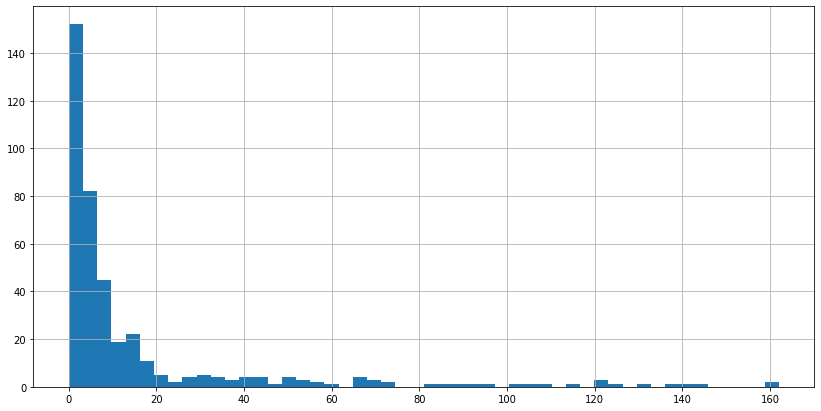

In [5]:
train_y = train_df["Total Interactions"]
test_y = test_df["Total Interactions"]

# Plot how the column we will be predicting looks like
train_df["Total Interactions"].hist(figsize=(14, 7), bins=50)
plt.show()

In [6]:
# Train and test the LinearRegression model
lin_reg = LinearRegression().fit(train_x, train_y)
pred_y = lin_reg.predict(test_x)

print('r2_score:', metrics.r2_score(test_y, pred_y))
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))

r2_score: -1.8472009935279843e+23
MAE: 7304867660597.809
MSE: 1.1872981087222904e+26


In [7]:
# Train and test the KNeighborsRegressor model
kn_reg = KNeighborsRegressor().fit(train_x, train_y)
pred_y = kn_reg.predict(test_x)

print('r2_score:', metrics.r2_score(test_y, pred_y))
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))

r2_score: -0.2481183865301977
MAE: 18.155223880597013
MSE: 802.2346268656717


In [8]:
# Train and test the RandomForestRegressor model
rf_reg = RandomForestRegressor(n_estimators=200).fit(train_x, train_y)
pred_y = rf_reg.predict(test_x)

print('r2_score:', metrics.r2_score(test_y, pred_y))
print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))

r2_score: -0.15872625833246934
MAE: 16.271199004975124
MSE: 744.7773684970979


In [9]:
# Show features importances
important_features = pd.Series(data=rf_reg.feature_importances_, index=train_x.columns)
important_features.sort_values(ascending=False, inplace=True)
important_features.astype(float)

δύο             0.079736
30χρονη         0.042989
φωτογραφία      0.039335
ανάρτηση        0.031752
ιωάννα          0.019736
                  ...   
ήπειρος         0.000000
εξελίξεις       0.000000
ηλιοθεραπεία    0.000000
γέμισαν         0.000000
φύγει           0.000000
Length: 1741, dtype: float64

Classification problem

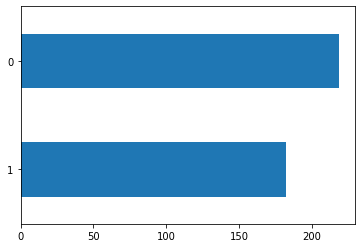

In [10]:
# For classification, we consider 2 categories:
#   -Class 0: posts with "Total Interactions" below the column's median
#   -Class 1: posts with "Total Interactions" above the column's median

median = train_df["Total Interactions"].median()

train_y = train_df["Total Interactions"].apply(lambda x: int(x > median))
test_y = test_df["Total Interactions"].apply(lambda x: int(x > median))

# Plot how the column we will be predicting looks like
train_df["Total Interactions"].apply(
    lambda x: int(x > median)).value_counts().sort_values().plot(kind = 'barh')
plt.show()

In [11]:
# Train and test the LogisticRegression model
lr_clf = LogisticRegression(solver='lbfgs').fit(train_x, train_y)
pred_y = lr_clf.predict(test_x)

print('accuracy:', metrics.accuracy_score(test_y, pred_y))
print('classification_report:\n', metrics.classification_report(test_y, pred_y))

accuracy: 0.6716417910447762
classification_report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75        77
           1       0.70      0.40      0.51        57

    accuracy                           0.67       134
   macro avg       0.68      0.64      0.63       134
weighted avg       0.68      0.67      0.65       134



In [12]:
# Train and test the KNeighborsClassifier model
kn_clf = KNeighborsClassifier().fit(train_x, train_y)
pred_y = kn_clf.predict(test_x)

print('accuracy:', metrics.accuracy_score(test_y, pred_y))
print('classification_report:\n', metrics.classification_report(test_y, pred_y))

accuracy: 0.5447761194029851
classification_report:
               precision    recall  f1-score   support

           0       0.66      0.43      0.52        77
           1       0.48      0.70      0.57        57

    accuracy                           0.54       134
   macro avg       0.57      0.57      0.54       134
weighted avg       0.58      0.54      0.54       134



In [13]:
# Train and test the RandomForestClassifier model
rf_clf = RandomForestClassifier(n_estimators=200).fit(train_x, train_y)
pred_y = rf_clf.predict(test_x)

print('accuracy:', metrics.accuracy_score(test_y, pred_y))
print('classification_report:\n', metrics.classification_report(test_y, pred_y))

accuracy: 0.5746268656716418
classification_report:
               precision    recall  f1-score   support

           0       0.76      0.38      0.50        77
           1       0.50      0.84      0.63        57

    accuracy                           0.57       134
   macro avg       0.63      0.61      0.57       134
weighted avg       0.65      0.57      0.56       134



In [14]:
# Show features importances
important_features = pd.Series(data=rf_clf.feature_importances_, index=train_x.columns)
important_features.sort_values(ascending=False, inplace=True)
important_features.astype(float)

survivor        0.016976
κοροναϊό        0.014076
κρατήσεις       0.007774
μάιος           0.006745
εμβόλιο         0.006229
                  ...   
σύζυγό          0.000000
ηλιοθεραπεία    0.000000
πεθάνω          0.000000
βασιλόπουλος    0.000000
αισιόδοξα       0.000000
Length: 1741, dtype: float64